# Q&A Activity Question Week -15

**Activity Description**<br>
Jio fibre wants to implement AI/ML in their systems. The activity task is to build a network intrusion detector, a predictive model capable of distinguishing between ``bad&#39;&#39; connections, called intrusions or attacks, and ``good&#39;&#39; normal connections.This database contains a standard set of data to be audited, which includes a wide variety of intrusions in the network environment. Your target is building a machine efficient learning model using probabilistic approach models, probabilities of bad or good connections using naïve bayes model. This is a multi-class classification. Fine tune the model and make a model which has at least 97 percent accuracy.

In [ ]:
#Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Reading the dataset

In [2]:
data= pd.read_csv(r'G:\my trials\GP Activity\tcp-connection (1).csv')
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [ ]:
# Performing general analysis

In [3]:
data.shape

(494021, 42)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [5]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

**Insights**<br>
-- The dataset contains 494021 rows and 42 columns<br>
-- There are no null values<br>
-- Column'intrusion' specifies connections as normal or various attacks.<br>

In [6]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# Drop the columns which are not contributing to the data.
data = data.drop(['num_outbound_cmds','is_host_login'], axis=1)

<AxesSubplot:>

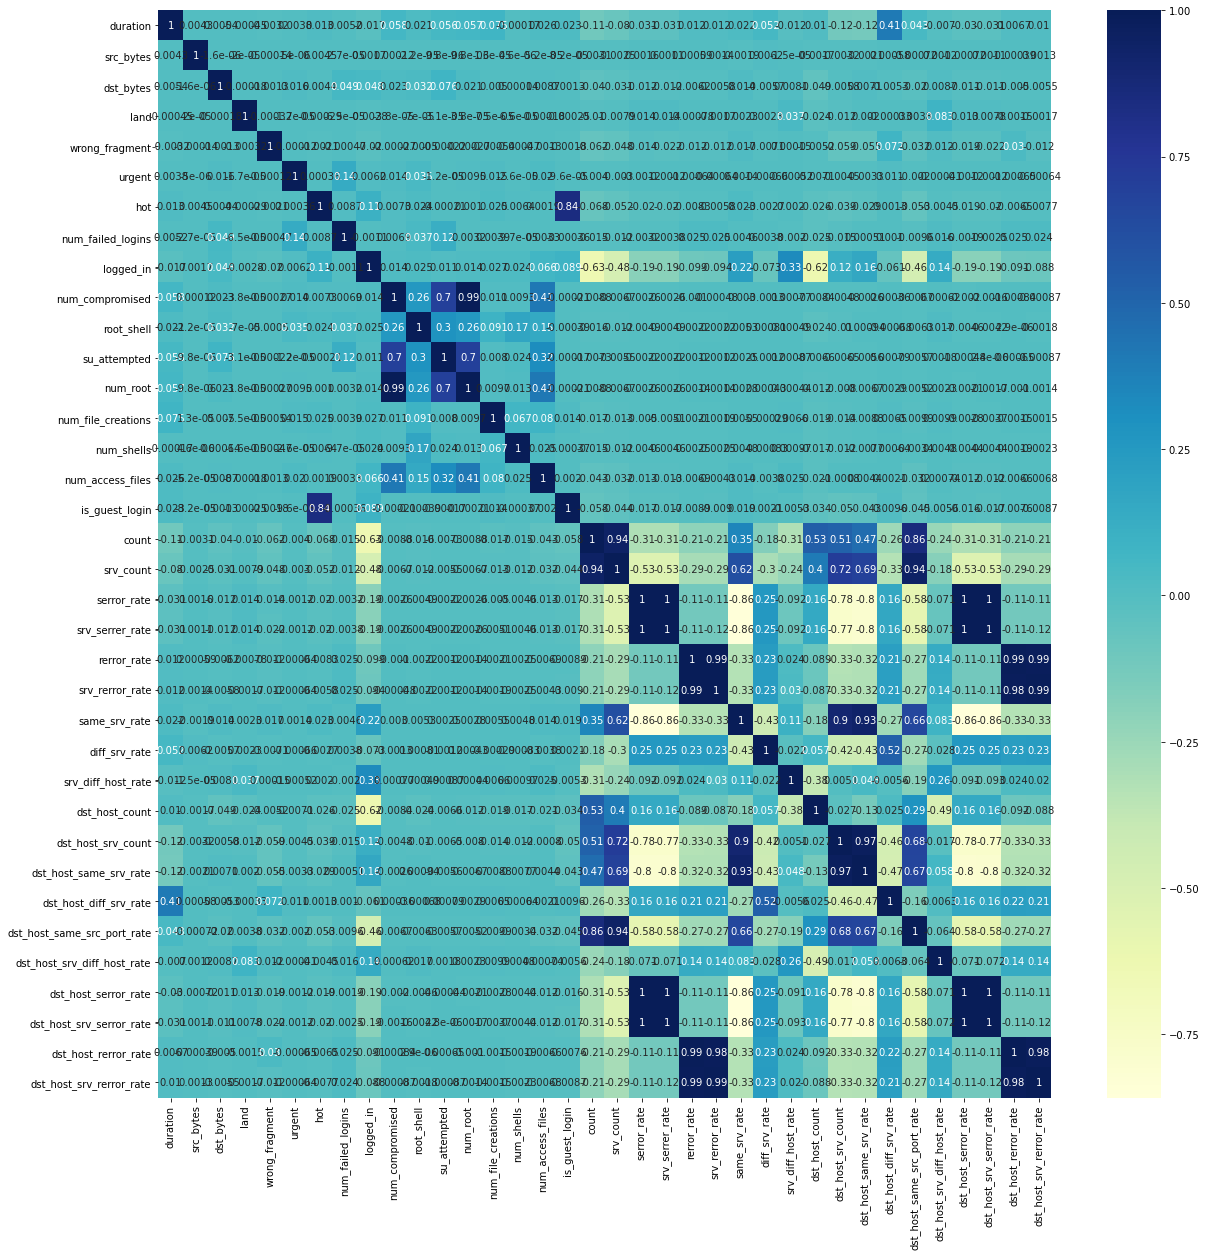

In [6]:
#Feature Selection Using correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [ ]:
# Drop highly correlated columns

In [8]:
dr_list=['num_root','srv_serrer_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_serror_rate',
         'dst_host_rerror_rate','dst_host_srv_rerror_rate','dst_host_same_srv_rate']
data.drop(dr_list, axis = 1, inplace = True)
data.shape

(494021, 32)

In [9]:
data['intrusion'].value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: intrusion, dtype: int64

In [10]:
#Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [11]:
#splitting into feature set and class labels
x = data.drop('intrusion', axis=1)
y=data['intrusion']

In [12]:
#splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=42)

In [13]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [14]:
# Fitting Gaussian Naive Bayes to the Training Set:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [15]:
#Prediction of the test set result:
y_pred=classifier.predict(x_test)


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test,y_pred)


In [17]:
accuracy_score(y_test,y_pred)

0.9126439201334348

In [18]:
# Fitting  Bernoulli Naive Bayes to the Training Set:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)

In [19]:
cm= confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9908182598416271

In [20]:
# Min max scaling
from sklearn import preprocessing
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=42)

In [22]:
# Fitting  Multinomial Naive Bayes to the Training Set:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)

In [23]:
cm= confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9869722928440724

**Insights**<br>
The Multinomial and Bernoulli Naive Bayes have an accuracy score of greater than 97%.